In [1]:
%config InlineBackend.figure_format = "svg"

from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime

## Importing data

In [2]:
datapath = "data/daily_weather_data.csv"
df = pd.read_csv(datapath)
df

,date,country,city,Latitude,Longitude,tavg,tmin,tmax,wdir,wspd,pres
0,21-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,23.4,20.9,25.5,329.0,9.3,1009.6
1,22-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,23.5,21.0,25.7,337.0,9.4,1010.0
2,23-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,23.5,21.1,25.5,41.0,8.2,1007.7
3,24-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,24.3,20.8,27.1,10.0,9.3,1004.4
4,25-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,26.5,22.7,30.0,9.0,9.7,1002.0
...,...,...,...,...,...,...,...,...,...,...,...
324642,07-10-2022,Western Sahara,El Aaiún,27.125287,-13.162500,22.1,18.6,25.6,3.0,24.7,1013.7
324643,08-10-2022,Western Sahara,El Aaiún,27.125287,-13.162500,22.1,19.6,25.6,2.0,20.5,1013.0
324644,09-10-2022,Western Sahara,El Aaiún,27.125287,-13.162500,23.4,19.6,29.6,34.0,24.0,1015.4
324645,10-10-2022,Western Sahara,El Aaiún,27.125287,-13.162500,23.1,18.6,29.7,39.0,28.4,1017.6


In [3]:
df.dtypes

date          object
country       object
city          object
Latitude     float64
Longitude    float64
tavg         float64
tmin         float64
tmax         float64
wdir         float64
wspd         float64
pres         float64
dtype: object

As we can see from the dtypes of the dataframe columns, the date column is not yet recognized as a date, but is rather an object type.
We will first convert this data into the correct datetime format.

Although there are way too many datapoints for us to check every possible datetime format, it seems that at least most of them follow the %d-%m-%Y format. Let's check if all of them are indeed in this format by verifying if pandas throws an error:

In [4]:
pd.to_datetime(df["date"], format="%d-%m-%Y")

0        2018-07-21
1        2018-07-22
2        2018-07-23
3        2018-07-24
4        2018-07-25
            ...    
324642   2022-10-07
324643   2022-10-08
324644   2022-10-09
324645   2022-10-10
324646   2022-10-11
Name: date, Length: 324647, dtype: datetime64[ns]

Pandas successfully converted all datapoints using this format! We are safe to use this format to convert the date column into a date format. While we're at it, we'll also convert the date column to the dataframe index:

In [5]:
df["date"] = pd.to_datetime(df["date"], format="%d-%m-%Y")
df = df.set_index("date")
df

,country,city,Latitude,Longitude,tavg,tmin,tmax,wdir,wspd,pres
date,,,,,,,,,,
2018-07-21,Abkhazia,Sukhumi,43.001525,41.023415,23.4,20.9,25.5,329.0,9.3,1009.6
2018-07-22,Abkhazia,Sukhumi,43.001525,41.023415,23.5,21.0,25.7,337.0,9.4,1010.0
2018-07-23,Abkhazia,Sukhumi,43.001525,41.023415,23.5,21.1,25.5,41.0,8.2,1007.7
2018-07-24,Abkhazia,Sukhumi,43.001525,41.023415,24.3,20.8,27.1,10.0,9.3,1004.4
2018-07-25,Abkhazia,Sukhumi,43.001525,41.023415,26.5,22.7,30.0,9.0,9.7,1002.0
...,...,...,...,...,...,...,...,...,...,...
2022-10-07,Western Sahara,El Aaiún,27.125287,-13.162500,22.1,18.6,25.6,3.0,24.7,1013.7
2022-10-08,Western Sahara,El Aaiún,27.125287,-13.162500,22.1,19.6,25.6,2.0,20.5,1013.0
2022-10-09,Western Sahara,El Aaiún,27.125287,-13.162500,23.4,19.6,29.6,34.0,24.0,1015.4


## Understanding the data

Let's take another look at the data columns and try to understand it better:

In [6]:
df.head()

,country,city,Latitude,Longitude,tavg,tmin,tmax,wdir,wspd,pres
date,,,,,,,,,,
2018-07-21,Abkhazia,Sukhumi,43.001525,41.023415,23.4,20.9,25.5,329.0,9.3,1009.6
2018-07-22,Abkhazia,Sukhumi,43.001525,41.023415,23.5,21.0,25.7,337.0,9.4,1010.0
2018-07-23,Abkhazia,Sukhumi,43.001525,41.023415,23.5,21.1,25.5,41.0,8.2,1007.7
2018-07-24,Abkhazia,Sukhumi,43.001525,41.023415,24.3,20.8,27.1,10.0,9.3,1004.4
2018-07-25,Abkhazia,Sukhumi,43.001525,41.023415,26.5,22.7,30.0,9.0,9.7,1002.0


The dataframe has the following columns:
- Country: the country of the weather data
- City: the city of the weather data
- Latitude: the latitude of the city
- Longitude: the longitude of the city
- tavg: average temperature for that city in that day (in Celsius)
- tmin: minimum temperature for that city in that day (in Celsius)
- tmax: maximum temperature for that city in that day (in Celsius)
- wdir: average wind direction for that city in that day (in degrees)
- wspd: average wind speed for that city in that day (in km/h)
- pres: average sea-level pressure for that city in that day (in hPa)

As we can see, there are two different kinds of features:
- Predictor variables: country, city, latitude and longitude, which describe the city of the weather forecast
- Time-series variables: tavg, tmin, tmax, wdir, wspd and pres, which describe the weather forecast of the city described by the predictor variables

In this notebook, we will be working only with time-series models. These are models that do not take into account predictor variables, only time-series variables. If $y_t$ is the true value of a predictor variable at time $t$, and $\hat{y}_t$ its estimated value, these models are of the form:

$$ \hat{y}_t = f \left( y_1, \dots, y_{t-1} \right) $$

It would be possible to train these models one every one of the cities of the dataset, but it is likely that it would be bad at predicting the temperature of other cities, since they don't take predictor variables into account.

## Filtering the dataset

Let's quickly check how many countries and cities there are in this dataset:

In [7]:
df["city"].unique().shape

(192,)

In [8]:
df["country"].unique().shape

(194,)

We can easily see that there are a total of 192 cities and 194 countries. One would expect there to be more cities than countries, but this is likely due to formatting errors in the city and/or country names, as well as possible missing values in these columns.

Since we will be working with time-series models that do not accept feature variables, we will shift our focus to only one of the cities:

In [9]:
df["city"].unique()

array(['Sukhumi', 'Mariehamn', 'Tirana', 'Algiers', 'Pago Pago', 'Luanda',
       'The Valley', "St. John's", 'Buenos Aires', 'Oranjestad', 'Vienna',
       'Baku', 'Nassau', 'Manama', 'Dhaka', 'Bridgetown', 'Minsk',
       'Brussels', 'Porto-Novo', 'Hamilton', 'Bouvet Island', 'Road Town',
       'Bandar Seri Begawan', 'Ouagadougou', 'Phnom Penh', 'Ottawa',
       'Praia', 'George Town', 'Bangui', "N'Djamena", 'Beijing',
       'Flying Fish Cove', 'West Island', 'Moroni', 'Kinshasa',
       'Brazzaville', 'Avarua', 'Yamoussoukro', 'Zagreb ', 'Havana',
       'Willemstad', 'Nicosia', 'Prague', 'Copenhagen', 'Djibouti',
       'Roseau', 'Santo Domingo', 'Cairo', 'San Salvador', 'Malabo',
       'Tallinn', 'Stanley', 'Tórshavn', 'Suva', 'Helsinki', 'Paris',
       'Cayenne', 'Papeete', 'Saint-Pierre ', 'Libreville', 'Banjul',
       'Berlin', 'Accra', 'Gibraltar', 'Athens', 'Nuuk', "St. George's",
       'Basse-Terre', 'Hagåtña', 'St. Peter Port', 'Conakry', 'Bissau',
       'Georgetown'

In [10]:
df = df.query("city == 'Budapest'")
df

,country,city,Latitude,Longitude,tavg,tmin,tmax,wdir,wspd,pres
date,,,,,,,,,,
2018-01-01,Hungary,Budapest,47.497912,19.040235,3.1,0.6,5.4,48.0,6.5,1011.7
2018-01-02,Hungary,Budapest,47.497912,19.040235,5.0,2.3,7.7,335.0,11.4,1009.5
2018-01-03,Hungary,Budapest,47.497912,19.040235,4.0,0.7,6.6,223.0,12.2,1007.9
2018-01-04,Hungary,Budapest,47.497912,19.040235,4.7,2.2,10.4,190.0,8.0,1005.8
2018-01-05,Hungary,Budapest,47.497912,19.040235,6.4,3.7,9.5,144.0,6.3,1007.3
...,...,...,...,...,...,...,...,...,...,...
2022-10-07,Hungary,Budapest,47.497912,19.040235,15.6,11.0,21.4,69.0,6.5,1028.0
2022-10-08,Hungary,Budapest,47.497912,19.040235,14.6,9.7,20.0,59.0,5.1,1021.7
2022-10-09,Hungary,Budapest,47.497912,19.040235,15.4,11.4,19.6,6.0,8.2,1023.5


Since we have fixed a city to analyze and forecast the weather, we can drop the Latitude and Longitude variables, as they hold no valuable information:

In [11]:
df = df.drop(columns=["Latitude", "Longitude"])
df

,country,city,tavg,tmin,tmax,wdir,wspd,pres
date,,,,,,,,
2018-01-01,Hungary,Budapest,3.1,0.6,5.4,48.0,6.5,1011.7
2018-01-02,Hungary,Budapest,5.0,2.3,7.7,335.0,11.4,1009.5
2018-01-03,Hungary,Budapest,4.0,0.7,6.6,223.0,12.2,1007.9
2018-01-04,Hungary,Budapest,4.7,2.2,10.4,190.0,8.0,1005.8
2018-01-05,Hungary,Budapest,6.4,3.7,9.5,144.0,6.3,1007.3
...,...,...,...,...,...,...,...,...
2022-10-07,Hungary,Budapest,15.6,11.0,21.4,69.0,6.5,1028.0
2022-10-08,Hungary,Budapest,14.6,9.7,20.0,59.0,5.1,1021.7
2022-10-09,Hungary,Budapest,15.4,11.4,19.6,6.0,8.2,1023.5


Now that we have taking care of the initial data pre-processing, we will split the dataset into train and test. We will hold out 2 weeks worth of data as test data, and use the remainder for training the model.

First, let's check if there are any missing dates in our date column:

In [12]:
pd.date_range(start="2018-01-01", end="2022-10-11", freq="D").difference(df.index)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

As there are no dates missing, we can easily split the last 14 days as test data:

In [13]:
df_train = df.iloc[:-14]
df_test = df.iloc[-14:]

print(df_train.shape, df_test.shape)

(1731, 8) (14, 8)


Now let's save these new dataframes:

In [14]:
df_train.to_csv("data/train.csv", index=False)
df_test.to_csv("data/test.csv", index=False)

And for the remainder of the data exploration and analysis, let's make our default dataframe the training dataframe:

In [15]:
df = df_train

## Data cleaning

Let's look for missing values in our columns:

In [16]:
df.isna().sum()

country     0
city        0
tavg        2
tmin        5
tmax        3
wdir       23
wspd       23
pres        8
dtype: int64

It seems that there are a few missing values in the numeric columns. A good strategy to deal with their values is to use mean imputation:

In [17]:
num_features = [col for col in df if df[col].dtype in ["int64", "float64"]]
df = df.fillna(df.mean(numeric_only=True))
df.isna().sum()

country    0
city       0
tavg       0
tmin       0
tmax       0
wdir       0
wspd       0
pres       0
dtype: int64

## Time plots

The first analysis we will make is to plot the different numeric columns over time:

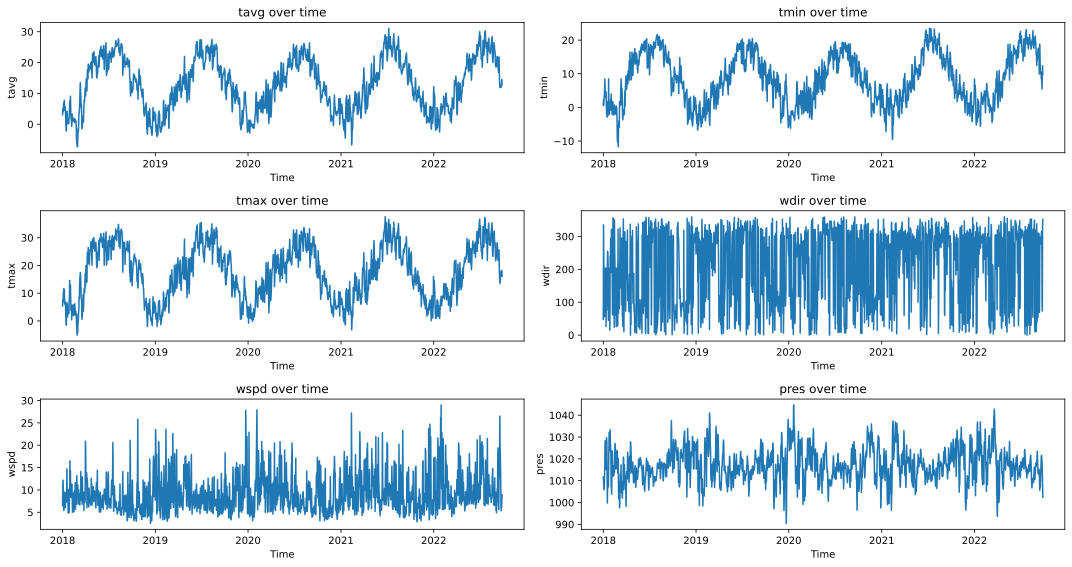

In [23]:
# Create subplot
rows, cols = 3, 2
fig, axs = plt.subplots(rows, cols, figsize=(15, 8))

# Iterate every numeric features
for k, col in enumerate(num_features):
    
    # Get right axis
    i, j = k // cols, k % cols
    ax = axs[i,j]
    
    # Get x and y
    x = df.index
    y = df[col]
    
    # Plot the column
    ax.set_title(f"{col} over time")
    ax.plot(x, y)
    ax.set_xlabel("Time")
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

From these plots alone, we can get many useful insights:
- All temperature features (avg, min and max) have a very strong yearly seasonal component.
- Pressure seems to have a somewhat seasonal component, although it seems from the plot above that it is mostly a noisy signal.
- Both wind speed and wind direction seem mostly noisy and unpredictable, although wind speed does also seem to have a very weak seasonal component.

To be able to inspect every season individually and see the more finegrained variations of these variables, let's make seasonal plots for them:

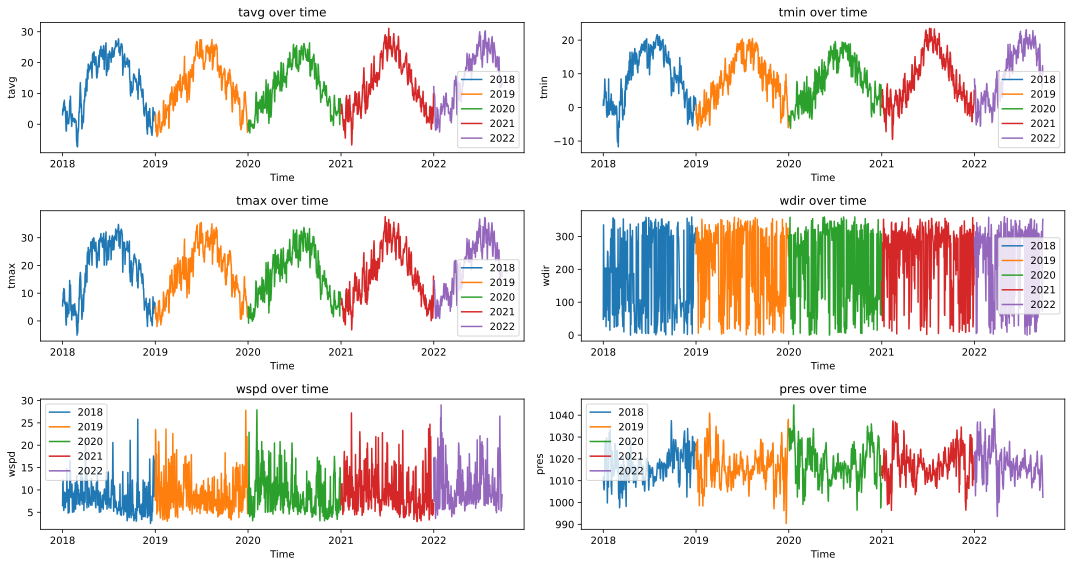

In [34]:
fig, axs = plt.subplots(rows, cols, figsize=(15, 8))

# Iterate numeric columns
for k, col in enumerate(num_features):
    
    # Get axis to plot on
    i, j = k // cols, k % cols
    ax = axs[i,j]
    
    # Configure axis
    ax.set_title(f"{col} over time")
    ax.set_xlabel("Time")
    ax.set_ylabel(col)
    
    # Iterate every season
    years = df.index.year.unique()
    for year in years:
        
        # Get indices for the current year
        idx = df.index.year == year
        
        # Get x and y
        x = df.index[idx].strftime("%d-%m")
        y = df.loc[idx,col]
        
        # Plot the data
        ax.plot(x, y, label=year)
        
    ax.legend()
    
plt.tight_layout()
plt.show()